# Indian Food Analysis

[Dataset](https://www.kaggle.com/nehaprabhavalkar/indian-food-101) mainly focuses on Indian cuisine, encompassing a diverse range of dishes. It provides detailed information on various aspects such as the types of dishes, key ingredients utilized in their preparation, along with associated preparation and cooking times. This comprehensive dataset offers a holistic view of Indian culinary practices, transforming it into a captivating field for exploration and thorough analysis.

### Data Preparation and Cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df = pd.read_csv('indian_food.csv')

In [3]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [4]:
# sample rows of the dataset
df.sample(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10,35,spicy,main course,NCT of Delhi,North
153,Puli sadam,"Urad dal, lemon, tamarind, cooked rice, curry ...",vegetarian,10,20,-1,main course,Tamil Nadu,South
192,Khandvi,"Green chili paste, white sesame seeds, gram fl...",vegetarian,20,45,spicy,snack,Gujarat,West
177,Daal Dhokli,"Whole wheat flour, dal, kokum, gur, bengal gra...",vegetarian,20,30,spicy,main course,Gujarat,West
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
235,Haq Maas,"Lamb, garam masala powder, curd, turmeric, bay...",non vegetarian,20,40,spicy,main course,Assam,North East
246,Payokh,"Basmati rice, rose water, sugar, clarified but...",vegetarian,-1,-1,sweet,dessert,Assam,North East
55,Anarsa,"Rice flour, jaggery, khus-khus seeds",vegetarian,10,50,sweet,dessert,Maharashtra,West
100,Makki di roti sarson da saag,"Palak, makki atta, mustard green, garam masala...",vegetarian,25,30,spicy,main course,Punjab,North
148,Paravannam,"Raw rice, jaggery, milk",vegetarian,-1,-1,spicy,main course,Kerala,South


In [5]:
# replacing -1 with 0, where ever -1 is a numerical type
df = df.replace(to_replace = -1, value = 0 )

In [6]:
# all the values that were -1 in prep_time and cook_time have been converted to 0
df[['prep_time', 'cook_time']]

,prep_time,cook_time
0,45,25
1,80,30
2,15,60
3,15,30
4,15,40
...,...,...
250,5,30
251,20,60
252,0,0
253,20,45


In [7]:
# this will replace all the values -1 as strings
df['region'] = df['region'].str.replace('-1','not specified')
df['state'] = df['state'].str.replace('-1','not specified')
df['flavor_profile'] = df['flavor_profile'].str.replace('-1','not specified')

In [8]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [9]:
# Replace NaN value in region with 'not specified'
df['region'].fillna('not specified', inplace=True)

df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

### Exploratory Analysis and Visualization

Let's dive into the data for a thorough analysis, aiming to extract valuable insights that will illuminate our understanding and guide informed decision-making.

In [10]:
# set the plt plot style

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (6, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
#counting vegetarian and non vegetarian dishes for bar chart
veg_nonveg = df.diet.value_counts()
veg_nonveg

diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64

<Axes: xlabel='diet', ylabel='count'>

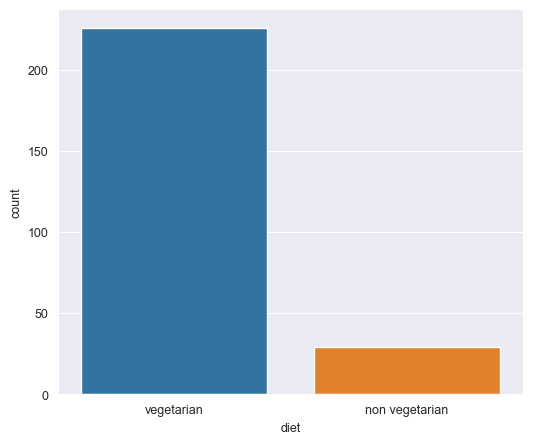

In [12]:
sns.barplot(x = veg_nonveg.index, y = veg_nonveg)

In [13]:
#counting region wise dishes
region_values = df.region.value_counts()
region_values

region
West             74
South            59
North            49
East             31
North East       25
not specified    14
Central           3
Name: count, dtype: int64

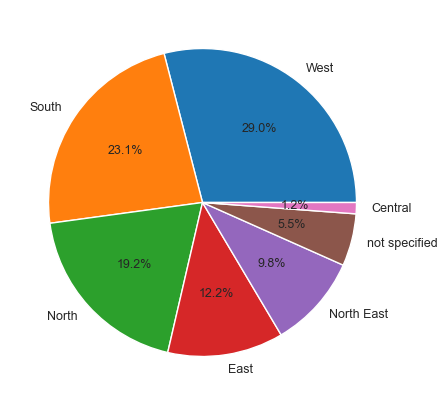

In [14]:
plt.pie(region_values, labels = region_values.index, autopct='%1.1f%%');

In [15]:
df['total_time'] = df['prep_time']+ df['cook_time']
df['total_time']

0       70
1      110
2       75
3       45
4       55
      ... 
250     35
251     80
252      0
253     65
254      0
Name: total_time, Length: 255, dtype: int64

In [16]:
df.sort_values('total_time', ascending = False).head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West,730
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North,620
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,not specified,main course,Kerala,South,535
29,Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East,510
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360,90,spicy,snack,not specified,South,450
144,Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thic...",vegetarian,360,90,spicy,snack,not specified,South,450
130,Idli,"Split urad dal, urad dal, idli rice, thick poh...",vegetarian,360,90,spicy,snack,not specified,South,450
48,Poornalu,"Chana dal, jaggery",vegetarian,240,60,sweet,dessert,Andhra Pradesh,South,300
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,sweet,dessert,Manipur,North East,285
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North,270


In [17]:
df['ing_list'] = df['ingredients'].apply(lambda x: x.split(', '))
df['ing_list']

0                      [Maida flour, yogurt, oil, sugar]
1                              [Gram flour, ghee, sugar]
2         [Carrots, milk, sugar, ghee, cashews, raisins]
3      [Flour, ghee, kewra, milk, clarified butter, s...
4      [Milk powder, plain flour, baking powder, ghee...
                             ...                        
250            [Glutinous rice, black sesame seeds, gur]
251    [Coconut milk, egg yolks, clarified butter, al...
252    [Cottage cheese, dry dates, dried rose petals,...
253    [Milk powder, dry fruits, arrowroot powder, al...
254    [Brown rice, fennel seeds, grated coconut, bla...
Name: ing_list, Length: 255, dtype: object

In [18]:
df['no_of_ing']= df.ing_list.str.len()
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70,"[Maida flour, yogurt, oil, sugar]",4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110,"[Gram flour, ghee, sugar]",3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75,"[Carrots, milk, sugar, ghee, cashews, raisins]",6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55,"[Milk powder, plain flour, baking powder, ghee...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,35,"[Glutinous rice, black sesame seeds, gur]",3
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,80,"[Coconut milk, egg yolks, clarified butter, al...",4
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,0,0,sweet,dessert,Jammu & Kashmir,North,0,"[Cottage cheese, dry dates, dried rose petals,...",5
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,65,"[Milk powder, dry fruits, arrowroot powder, al...",4


In [19]:
df.sort_values('no_of_ing', ascending = False).head(1)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,ing_list,no_of_ing
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45,"[Flour, ghee, kewra, milk, clarified butter, s...",10


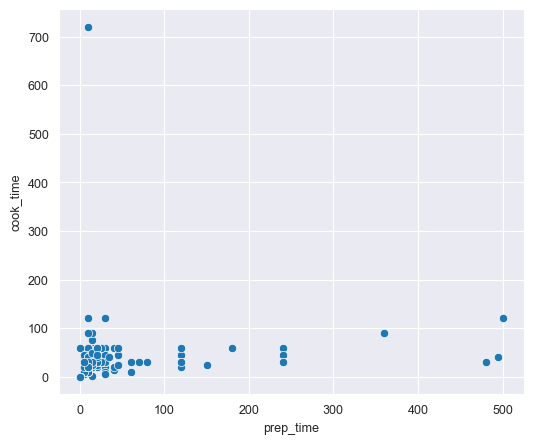

In [20]:
sns.scatterplot(x = df.prep_time, y = df.cook_time);

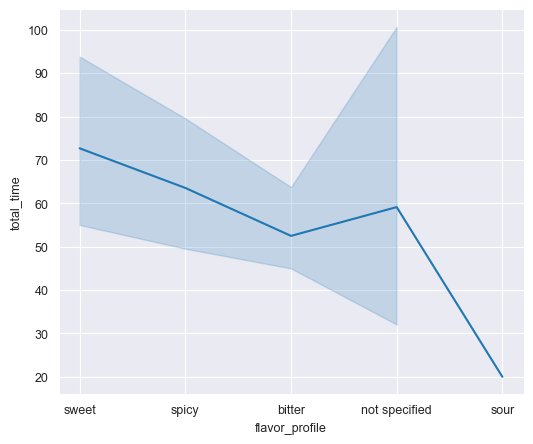

In [21]:
sns.lineplot(x='flavor_profile', y='total_time', data=df);

In [22]:
flavor_values = df.flavor_profile.value_counts()
flavor_values

flavor_profile
spicy            133
sweet             88
not specified     29
bitter             4
sour               1
Name: count, dtype: int64

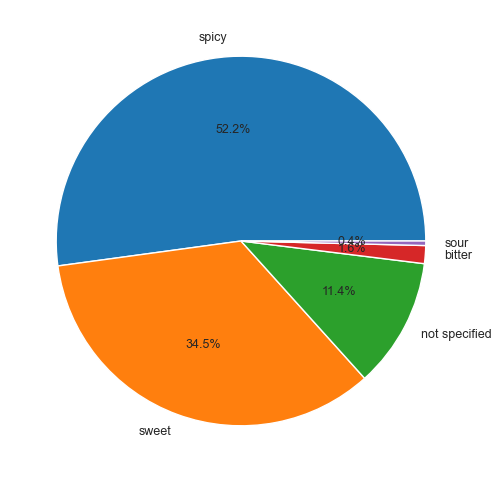

In [23]:
plt.figure(figsize=(10,6))
plt.pie(flavor_values, labels = flavor_values.index, autopct='%1.1f%%');

In [24]:
course_values = df.course.value_counts()
course_values

course
main course    129
dessert         85
snack           39
starter          2
Name: count, dtype: int64

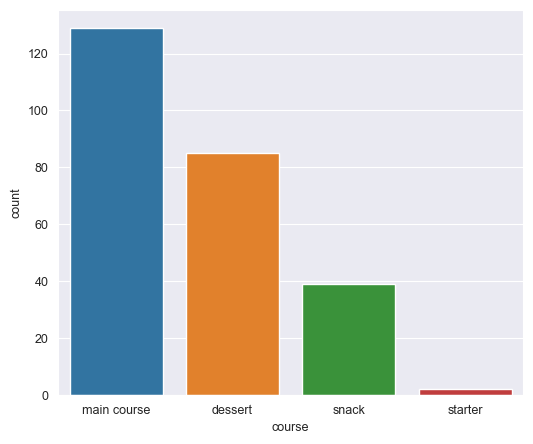

In [25]:
sns.barplot(x = course_values.index, y = course_values);

### Insights

> 1. Is indian food primarily Vegetarian or Non Vegetarian?
- Vegetarian
> 2. Which region has the most varities of food in India?
- West region 
> 3. Top 10 dishes which takes most time to prepare.
- Shrikhand
> 4. Which dish requires the most number of ingredients to make?
- Ghevar
> 5. Comparing cook time and prep time of dishes
- Most dishes' cooktime is less then 150 mins with one exception which takes more than 700 minutes to cook.
- Preptime has high variability
> 6. Trying to see which flavor profile food takes usually maximum time to prepare?
- Desserts / Sweets
> 7. Flavor wise breakdown of food items using piechart.
- Indian foods are mostly spicy
> 8. What meal(main course, starter etc.) is the Indian food considered primarily?
- Indian food is mostly a main course meal, followed by dessert.